<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/Covid_19(INDIA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 INDIA**

> The COVID-19 datasets used in the notebook are taken from "Kaggle". The names of these datasets are mentioned below:

*  covid_19_india.csv
*   StatewiseTestingDetails.csv




URL: 


1.   https://www.kaggle.com/sudalairajkumar/covid19-in-india
2.   https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_recovered.csv
3. https://api.covid19india.org/documentation/csv/
4. https://api.covid19india.org/
5. https://documenter.getpostman.com/view/10724784/SzYXXKmA?version=latest
6. https://api.rootnet.in/






In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import json
# Bar chart
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
IndianStates = pd.read_csv('/content/drive/MyDrive/Google Colab Data /state_wise.csv')
IndianStates.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,10245326,9833339,148475,260678,30/12/2020 02:44:28,2834,TT,0,0,0,NaN
1,Maharashtra,1925066,1820021,49373,54537,29/12/2020 20:30:26,1135,MH,0,0,0,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Karnataka,917571,893617,12074,11861,29/12/2020 21:16:28,19,KA,0,0,0,NaN
3,Andhra Pradesh,881599,871116,7100,3383,29/12/2020 21:47:27,0,AP,0,0,0,NaN
4,Tamil Nadu,816132,795293,12092,8747,29/12/2020 21:16:30,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...


In [3]:
IndianStatesDistricts = pd.read_csv('/content/drive/MyDrive/Google Colab Data /districts.csv')
IndianStatesDistricts.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [4]:
# Population data country 
with open('/content/drive/MyDrive/Google Colab Data /IndianPopulation.json') as f:
  data = json.load(f)
  # print(data)

  fix = json.dumps(data, ensure_ascii=False, indent=4)

In [5]:
!curl --location --request GET 'https://api.covid19india.org/state_district_wise.json' > stateDistrict.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  202k  100  202k    0     0  3269k      0 --:--:-- --:--:-- --:--:-- 3269k


In [6]:
with open("/content/stateDistrict.json") as f:
  data = json.load(f)
# print(data)

In [7]:
districtDF = pd.read_json('/content/stateDistrict.json').T.reset_index()
print(districtDF.columns)

statedistrict = {}

districtActive = {}
districtConfirmed = {}
districtRecovered = {}
districtDeceased = {}


# for districts in districtDF
# districtsData = districtDF.districtData[0]


for index, rows in districtDF.districtData.items():
  districtsData = districtDF.districtData[index]
  # districtsData.to_dict()


  for key, value in districtsData.items():
    if key not in districtActive:
      districtActive[key]=value['active']
    if key not in districtConfirmed:
      districtConfirmed[key]=value['confirmed']
    if key not in districtRecovered:
      districtRecovered[key]=value['recovered']
    if key not in districtDeceased:
      districtDeceased[key]=value['deceased']



Index(['index', 'districtData', 'statecode'], dtype='object')


In [8]:
# Creating Dataframe from Active cases dictionary - districtActive

ActiveDF = pd.DataFrame.from_dict(districtActive, orient='index')
ActiveDFV1 = ActiveDF.reset_index()
ActiveDFV2 = ActiveDFV1.rename(columns={'index':'Districts',0:'Active'})

In [9]:
# Creating Dataframe from Confirmed cases dictionary - districtActive

ConfDF = pd.DataFrame.from_dict(districtConfirmed, orient='index')
ConfDFV1 = ConfDF.reset_index()
ConfDFV2 = ConfDFV1.rename(columns={'index':'Districts',0:'Confirmed'})

In [10]:
# Creating Dataframe from Recovered cases dictionary - districtActive

RecDF = pd.DataFrame.from_dict(districtRecovered, orient='index')
RecDFV1 = RecDF.reset_index()
RecDFV2 = RecDFV1.rename(columns={'index':'Districts',0:'Recovered'})

In [11]:
# Creating Dataframe from Deceased cases dictionary - districtActive

DecDF = pd.DataFrame.from_dict(districtDeceased, orient='index')
DecDFV1 = DecDF.reset_index()
DecDFV2 = DecDFV1.rename(columns={'index':'Districts',0:'Deceased'})

In [12]:
# Merging all the dataframes together
finalDFV1  = ActiveDFV2.merge(ConfDFV2, on = "Districts", how = "left")
finalDFV2 = finalDFV1.merge(RecDFV2, on = "Districts", how = "left")
finalDFV3 = finalDFV2.merge(DecDFV2, on = "Districts", how = "left")

In [13]:
# Just to know - Districts of India.

list_of_districts = list(set(finalDFV3['Districts']))

unique=[]

for districtsList in list_of_districts:
  unique.append(districtsList)

print(unique)
print(len(unique))

['Nalanda', 'Wanaparthy', 'Sidhi', 'Kurung Kumey', 'Mehsana', 'Cooch Behar', 'Darrang', 'Chengalpattu', 'Supaul', 'Bhilwara', 'Perambalur', 'Thiruvarur', 'Pilibhit', 'Suryapet', 'East Khasi Hills', 'Kupwara', 'Vijayapura', 'Kannauj', 'Malkangiri', 'North Goa', 'Hingoli', 'Majuli', 'Karur', 'Krishna', 'Sivasagar', 'Muzaffarpur', 'Faridkot', 'Jharsuguda', 'Ghaziabad', 'Ratlam', 'Pudukkottai', 'Sonipat', 'Diu', 'Amethi', 'Ferozepur', 'Dima Hasao', 'Buxar', 'Chitradurga', 'Other State', 'Kamjong', 'Shamli', 'Dibrugarh', 'Hardoi', 'Goalpara', 'Thrissur', 'Nicobars', 'Saitual', 'Bishnupur', 'Chamarajanagara', 'Ahmednagar', 'Osmanabad', 'Nizamabad', 'Deoria', 'Rudraprayag', 'Nayagarh', 'Latehar', 'South West Garo Hills', 'Ayodhya', 'Nadia', 'Subarnapur', 'Solan', 'Godda', 'Agra', 'Paschim Bardhaman', 'Hamirpur', 'Jalna', 'Shrawasti', 'Barmer', 'Bhiwani', 'Zunheboto', 'Kalimpong', 'Simdega', 'Kamle', 'East Garo Hills', 'Gumla', 'West Champaran', 'Morbi', 'Krishnagiri', 'Baloda Bazar', 'Shahdar

In [14]:
# Getting the state name from IndianStatesDistricts
IndianStatesDistricts.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


**Numbers from different districts from respective states**

In [15]:
# Dropping the rows that have unknown district names
finalDFV4 = finalDFV3[~finalDFV3.Districts.str.contains("Unknown")]
finalDFV4.head(10)

,Districts,Active,Confirmed,Recovered,Deceased
0,Unassigned,0,0,0,0
1,Nicobars,0,0,0,0
2,North and Middle Andaman,0,1,1,0
3,South Andaman,19,51,32,0
5,Foreign Evacuees,0,434,434,0
6,Anantapur,68,67558,66893,597
7,Chittoor,183,86785,85756,846
8,East Godavari,206,124067,123225,636
9,Guntur,280,75282,74334,668
10,Krishna,300,48335,47359,676


In [16]:
StateDisDF = IndianStatesDistricts.filter(['State', 'District'], axis=1)
StateDisDFV1 = StateDisDF.rename(columns={'State':'States','District':'Districts'})

In [17]:
# finding states for respective districts in Unique
StateDisDFV1Dict = StateDisDFV1.set_index('States')['Districts'].to_dict()

MatchStateDis = {}

for districts in unique:
  for states, districtsv1 in StateDisDFV1Dict.items():
    if districtsv1 in districts:
      # print(districts, states)
      if states not in MatchStateDis:
        MatchStateDis[states]=districts

In [18]:
district_to_stateDF = pd.DataFrame.from_dict(MatchStateDis, orient='index')
district_to_stateDFV1 = district_to_stateDF.reset_index()
district_to_stateDFV2 = district_to_stateDFV1.rename(columns={'index': 'States', 0:'Districts'})
finalDFV4.merge(district_to_stateDFV2, on = "Districts", how = "left").head(70)

finalMerge =  finalDFV4.merge(district_to_stateDFV2, on = "Districts", how = "left")
finalMerge.to_csv('COVID.csv')

**Total Numbers from different states.**

In [30]:
# Total numbers from different States
FilteredIndianStates = IndianStates.filter(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active' ])
FilteredIndianStates

,State,Confirmed,Recovered,Deaths,Active
0,Total,10245326,9833339,148475,260678
1,Maharashtra,1925066,1820021,49373,54537
2,Karnataka,917571,893617,12074,11861
3,Andhra Pradesh,881599,871116,7100,3383
4,Tamil Nadu,816132,795293,12092,8747
5,Kerala,749451,681397,3015,64860
6,Delhi,624118,607494,10502,6122
7,Uttar Pradesh,583941,561257,8340,14344
8,West Bengal,549715,527272,9655,12788
9,Odisha,329001,324775,1921,2305


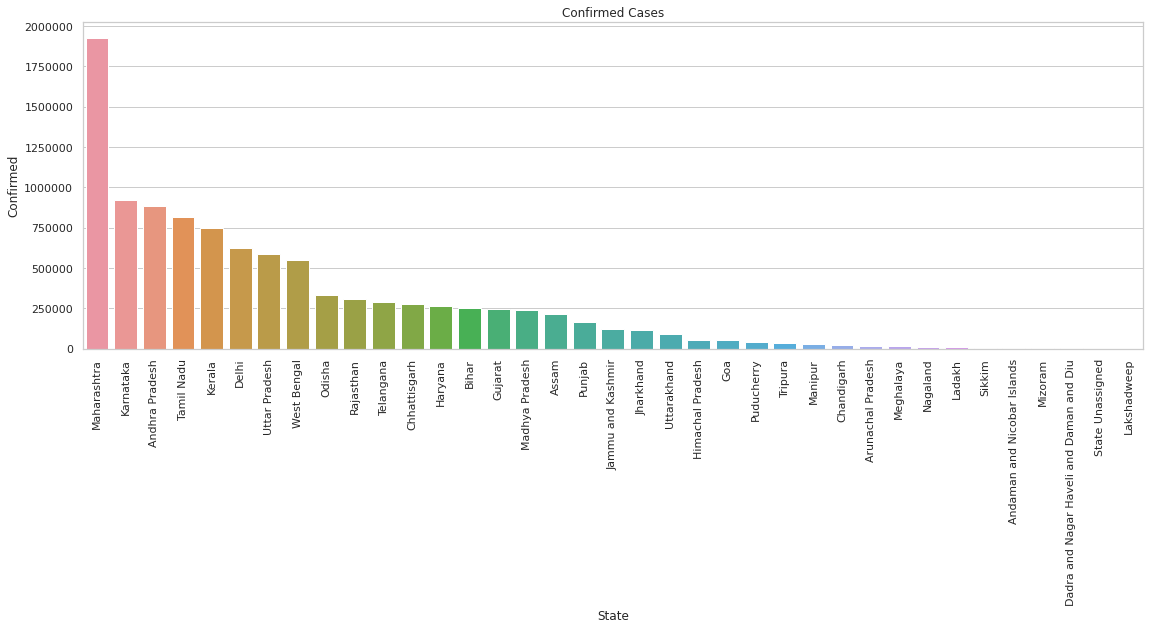

In [60]:
# States confirmed Cases.

plt.subplots(figsize=(19,6))
sns.barplot(x="State", y="Confirmed", data=FilteresIndianStates[1:])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Confirmed Cases')
plt.show()

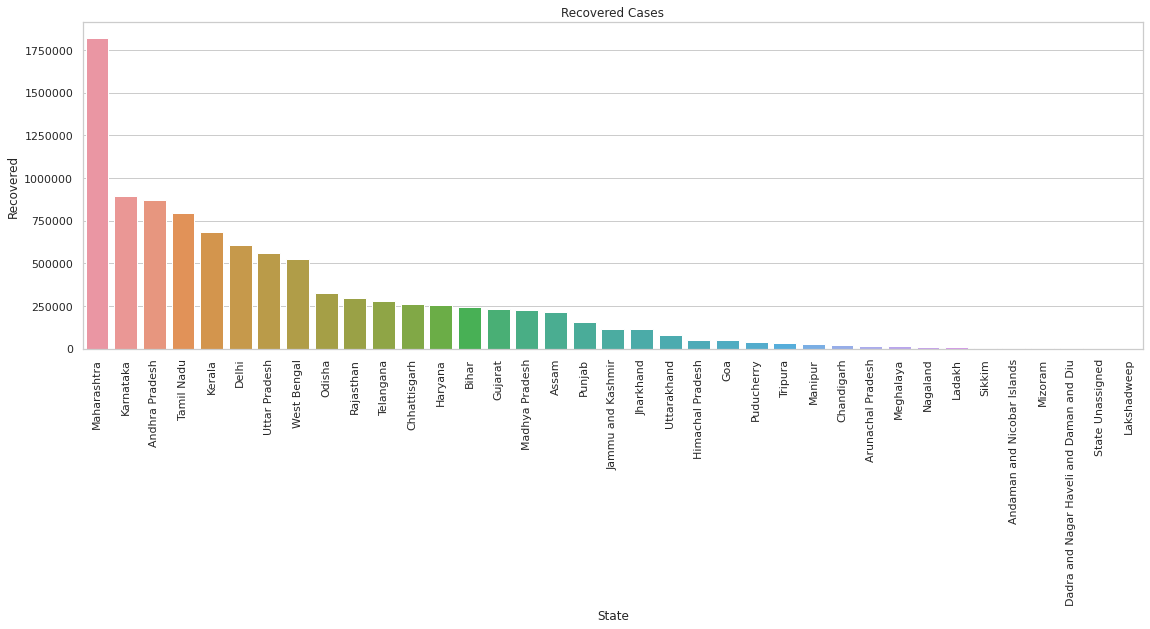

In [62]:
# States recovered Cases.

plt.subplots(figsize=(19,6))
sns.barplot(x="State", y="Recovered", data=FilteresIndianStates[1:])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Recovered Cases')
plt.show()

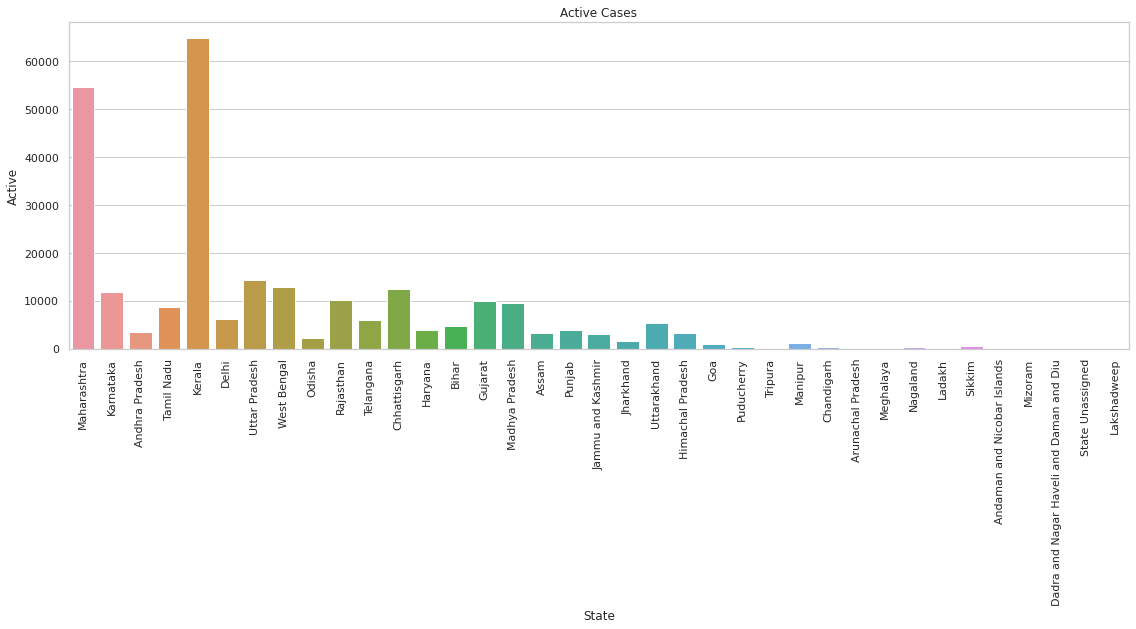

In [64]:
# States Active Cases.

plt.subplots(figsize=(19,6))
sns.barplot(x="State", y="Active", data=FilteresIndianStates[1:])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Active Cases')
plt.show()

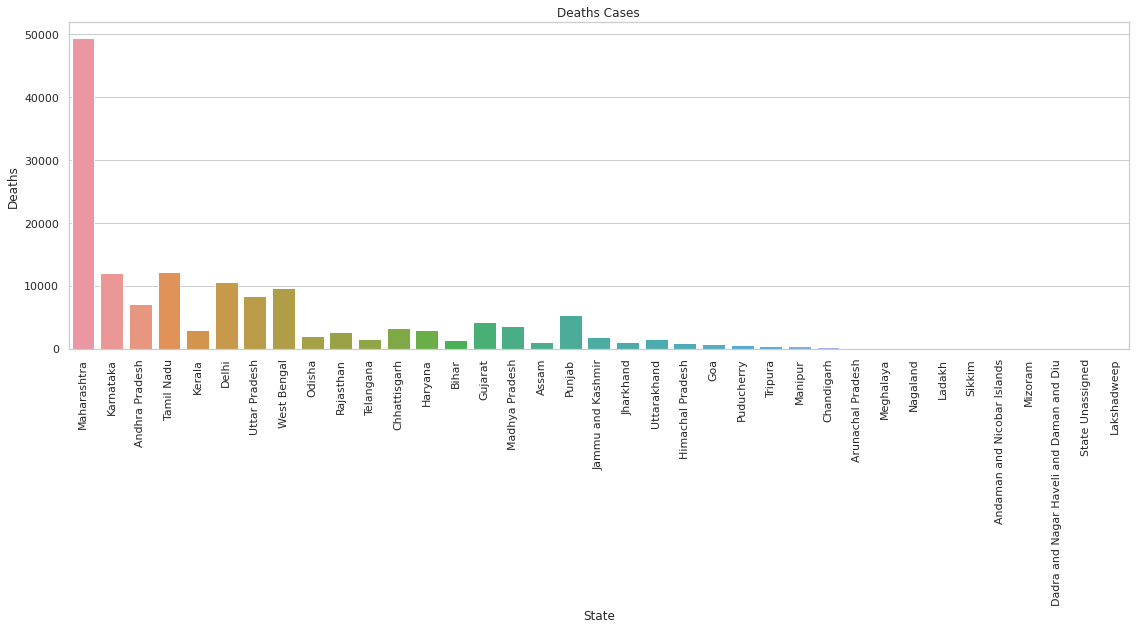

In [65]:
# States deaths Cases.

plt.subplots(figsize=(19,6))
sns.barplot(x="State", y="Deaths", data=FilteresIndianStates[1:])
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Deaths Cases')
plt.show()

In [101]:
comparisonDF = FilteredIndianStates.rename(columns={'State': ''})
comparisonDFV1 = comparisonDF.set_index(comparisonDFV1.iloc[:,0])
comparisonDFV2 = comparisonDFV1.drop(comparisonDFV1.columns[0], axis=1)
comparisonDFV3 = comparisonDFV2.drop(['Total'])
comparisonDFV3

,Confirmed,Recovered,Deaths,Active
,,,,
Maharashtra,1925066,1820021,49373,54537
Karnataka,917571,893617,12074,11861
Andhra Pradesh,881599,871116,7100,3383
Tamil Nadu,816132,795293,12092,8747
Kerala,749451,681397,3015,64860
Delhi,624118,607494,10502,6122
Uttar Pradesh,583941,561257,8340,14344
West Bengal,549715,527272,9655,12788
Odisha,329001,324775,1921,2305


**The comparison chart for all the states of India**

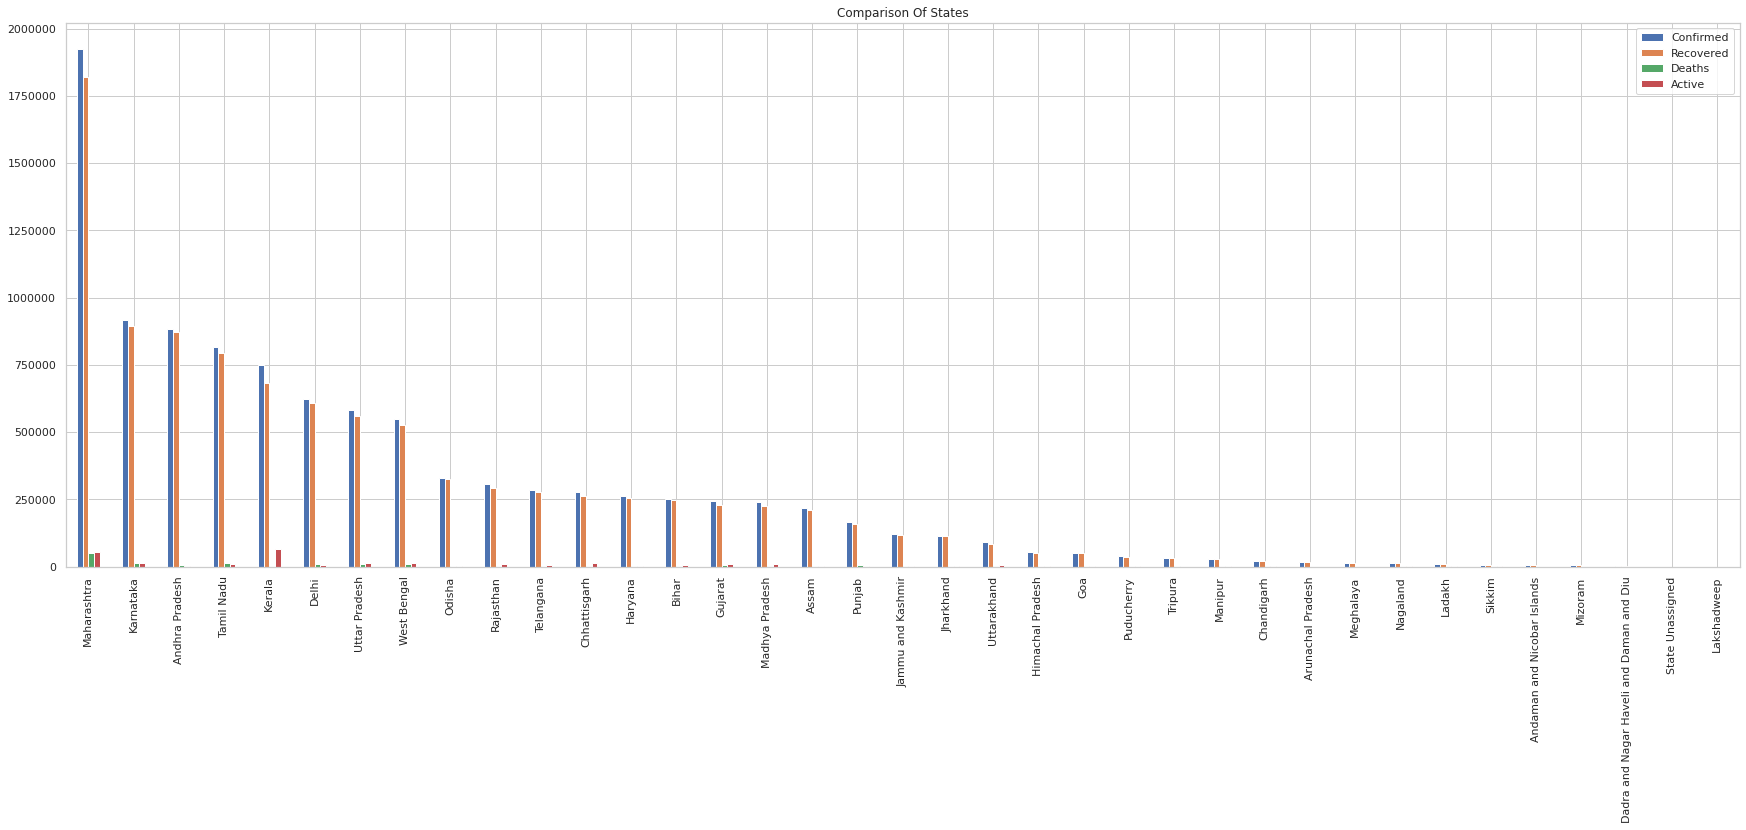

In [103]:
comparisonDFV3.plot.bar(rot=90, figsize=(30,10))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison Of States')
plt.show()